# Comparison of chiral and racemic crystals
**Instruction**  
The aim of this notebook is to compare chiral and racemic crystals of enol-(S)-1 and enol-(S)-2 compounds.  
The following code requires `lattice_summary.xlsx`.  

**Contents**  
1. Scatter plot of lattice parameters
1. Comparison of slope using bars

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Arial'
plt.rcParams["font.size"] = 14

In [7]:
df = pd.read_excel('./dataset/lattice_summary.xlsx')

In [8]:
non_std_columns = [column for column in df.columns if 'std' not in column]
df_rev = df[non_std_columns]
df_rev = df_rev.dropna(axis=1)
df_rev = df_rev.iloc[:,:11]
df_rev.head()

,Compound,T,a,b,c,alpha,beta,gamma,V,density,Dihedral angle
0,enol-(S)-1,20,6.2330,9.9318,19.711,85.466,86.216,88.759,1213.6,1.061,46.68
1,enol-(S)-1,-20,6.1931,9.9120,19.643,84.930,86.249,88.586,1198.3,1.074,46.92
2,enol-(S)-1,-50,6.1859,9.9318,19.644,84.496,86.226,88.270,1198.4,1.074,47.17
3,enol-(S)-1,-80,6.1564,9.9217,19.574,84.241,86.241,88.053,1186.3,1.085,47.42
4,enol-(S)-2,20,6.3750,9.8470,39.354,90.000,90.000,90.000,2470.4,1.042,36.99


## 1. Scatter plot of lattice parameters

In [4]:
df_rev[df_rev['Compound']=='enol-(S)-1']['T']

0    20
1   -20
2   -50
3   -80
Name: T, dtype: int64

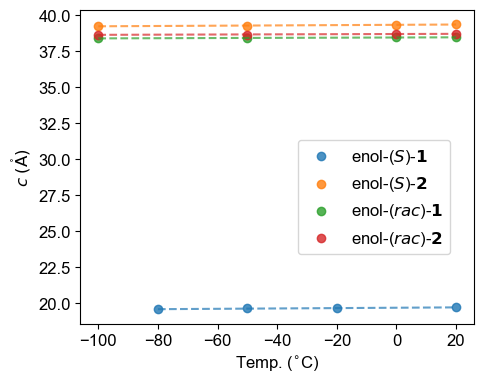

In [5]:
plt.rcParams["font.family"] = 'Arial' #'Calibri'
plt.rcParams["font.size"] = 12
fig, ax = plt.subplots(figsize=(5,4))
# sns.scatterplot(data=df_rev, x='T', y='a', hue='Compound')
line_kws = {'linestyle':'dashed', 'alpha':0.7, 'linewidth':1.5}
y_name = 'c'
sns.regplot(data=df_rev[df_rev['Compound']=='enol-(S)-1'], x='T', y=y_name, ci=0, label=r'enol-($\mathit{S}$)-$\mathbf{1}$', line_kws=line_kws)
sns.regplot(data=df_rev[df_rev['Compound']=='enol-(S)-2'], x='T', y=y_name, ci=0, label=r'enol-($\mathit{S}$)-$\mathbf{2}$', line_kws=line_kws)
sns.regplot(data=df_rev[df_rev['Compound']=='enol-(rac)-1'], x='T', y=y_name, ci=0, label='enol-($\mathit{rac}$)-$\mathbf{1}$', line_kws=line_kws)
sns.regplot(data=df_rev[df_rev['Compound']=='enol-(rac)-2'], x='T', y=y_name, ci=0, label='enol-($\mathit{rac}$)-$\mathbf{2}$', line_kws=line_kws)
ax.set(xlabel=r'Temp. ($^{\circ}$C)', ylabel=r'$c$ $(\mathrm{\mathring{A}})$')
fig.legend(bbox_to_anchor=(0.95, 0.3), loc='lower right', borderaxespad=1)
fig.tight_layout()
plt.savefig(f'./figures/Lattice_{y_name}.png', dpi=300)

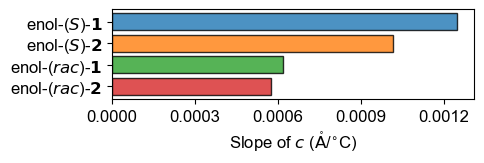

In [167]:
names = ['enol-($\mathit{S}$)-$\mathbf{1}$', 'enol-($\mathit{S}$)-$\mathbf{2}$', 'enol-($\mathit{rac}$)-$\mathbf{1}$', 'enol-($\mathit{rac}$)-$\mathbf{2}$']
# names = ['', ' ', '  ', '   ']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
fig, ax = plt.subplots(figsize=(5,1.8))
slope_a = [0.000724018, 0.000548329, 0.000906945, 0.000264006] # Axes of Rac-2 was already changed.
slope_b = [4.24201E-05, 0.001055706, 6.73775E-05, 0.000741066]
slope_c = [0.001247489, 0.001016974, 0.000616859, 0.000575187]
ax.barh(names[::-1], slope_c[::-1], color=colors[::-1], alpha=0.8, ec='k')
ax.set(xlabel='Slope of $c$ ($\mathrm{\mathring{A}}$/$^{\circ}$C)', xticks=np.arange(0, 0.0013, 0.0003))
fig.tight_layout()
plt.savefig(f'./figures/Lattice-slope_c.png', dpi=300)

In [9]:
def vis_corr_matrix(i):
    plt.figure(figsize=(10,7))
    sns.heatmap(df_rev[df_rev['Compound']==compound[i]].corr(),linewidths=0.1, vmax=1.0, 
                square=True, linecolor='grey', annot=True, cmap=colormap)
    # plt.savefig(f'Corrmatrix_{compound[i]}.png', dpi=300)

In [11]:
colormap = plt.cm.coolwarm
compound = list(set(df_rev['Compound']))
# print(compound)

# for i in range(4):
#     vis_corr_matrix(i)

## 2. Comparison of slope using bars

In [10]:
from sklearn.linear_model import LinearRegression

def df2coef(df, key1, key2):
    X = df[[key1]]
    y = df[key2]

    # Linear regression
    model = LinearRegression()
    model.fit(X, y)

    # Get slope
    coef = model.coef_[0]
    return coef

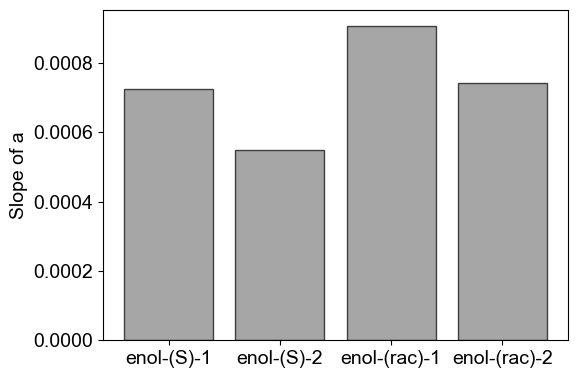

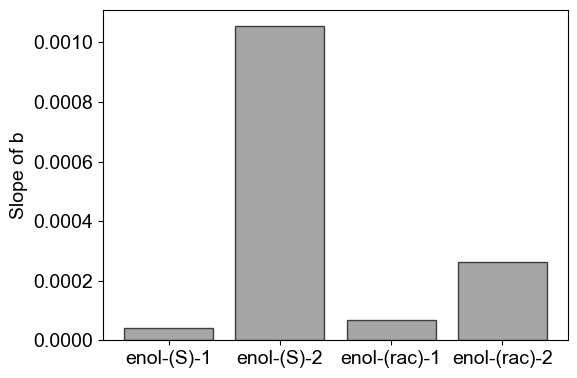

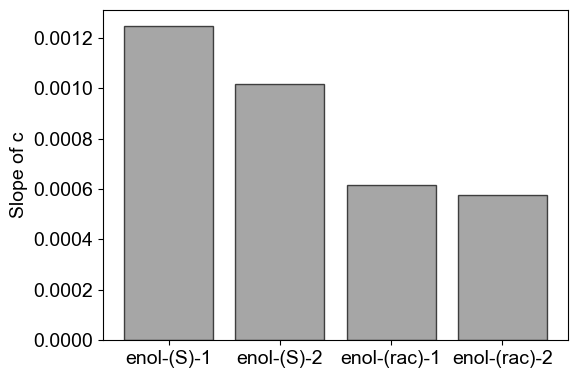

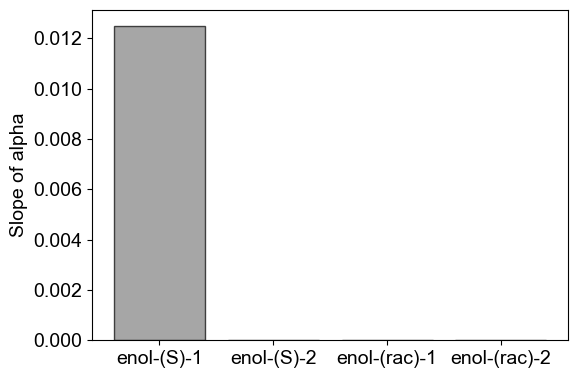

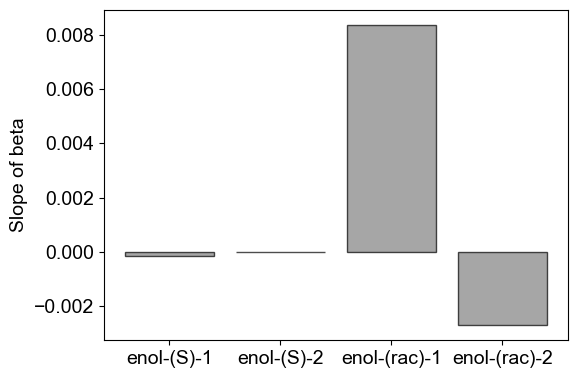

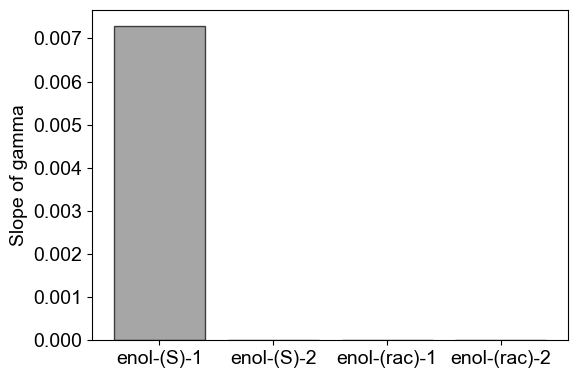

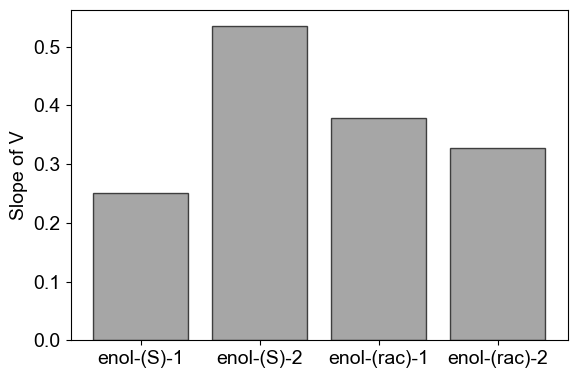

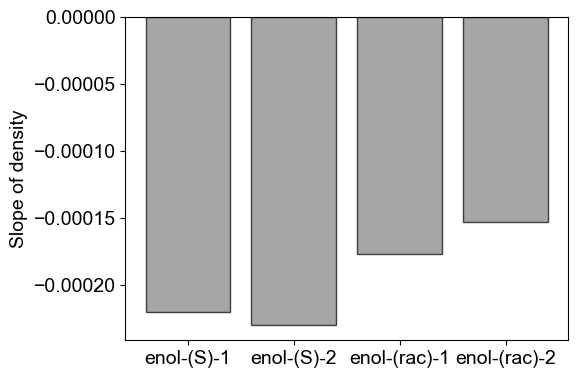

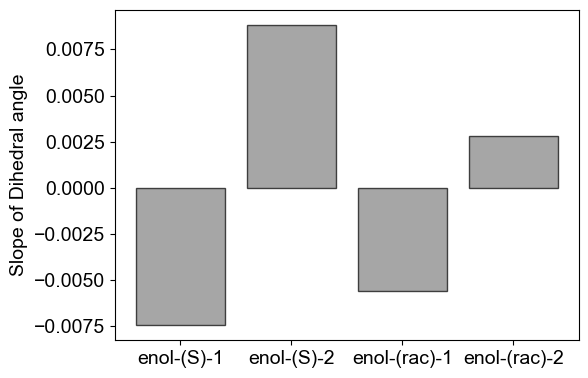

In [11]:
compound = ['enol-(S)-1', 'enol-(S)-2', 'enol-(rac)-1', 'enol-(rac)-2']
var_list = ['a', 'b', 'c', 'alpha', 'beta', 'gamma', 'V', 'density', 'Dihedral angle']

coef_list_all = []
for var in var_list:
    coef_list = []
    for name in compound:
        coef = df2coef(df_rev[df_rev['Compound']==name], 'T', var)
        coef_list.append(coef)
    coef_list_all.append(coef_list)

    plt.figure(figsize=(6,4))
    plt.bar(compound, coef_list, ec='k', color='gray', alpha=0.7)
    plt.ylabel(f'Slope of {var}')
    plt.tight_layout()
    # plt.savefig(f'./figures/Slope_{var}.png', dpi=300)

In [12]:
tmp_slope = pd.DataFrame({
    'a': coef_list_all[0],
    'b': coef_list_all[1],
    'c': coef_list_all[2],
    'alpha': coef_list_all[3],
    'beta': coef_list_all[4],
    'gamma': coef_list_all[5],
    'V': coef_list_all[6],
    'density': coef_list_all[7],
    'Dihedral angle': coef_list_all[8],
    'DXB': coef_list,
})
# tmp_slope.to_csv('tmp_slope.csv')
a

In [6]:
dxb = pd.read_csv('../Box Sync/Personal/同期資料/共同研究_茨城大・倉持先生/20220706/data.csv')
dxb.head()

,degC,1Naph_ChiralS,1Naph Rac,2Naph_ChiralS,2Naph_Rac
0,-100,0.0420,0.0389,0.0400,0.0460
1,-80,0.0335,0.0403,0.0385,0.0397
2,-60,0.0411,0.0438,0.0359,0.0416
3,-40,0.0353,0.0398,0.0416,0.0397
4,-20,0.0360,0.0437,0.0359,0.0385


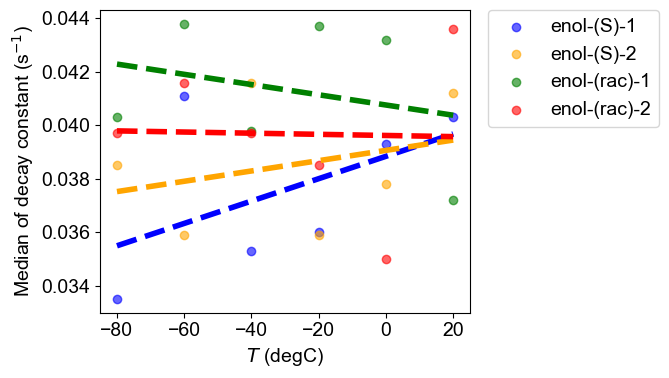

In [33]:
coef_list = []
def plot_regression(ax, x, y, color, label):
    model = LinearRegression()
    model.fit(x.values.reshape(-1, 1), y)
    x_pred = pd.DataFrame({'x_column': [x.min(), x.max()]})
    y_pred = model.predict(x_pred)
    coef_list.append(model.coef_[0])
    ax.scatter(x, y, c=color, alpha=0.6, label=label)
    # ax.plot(x, y, c=color, alpha=0.6)
    ax.plot(x_pred, y_pred, color=color, linestyle='dashed', linewidth=4)

# 4つの散布図をプロット
fig, ax = plt.subplots(figsize=(7,4))
plot_regression(ax, dxb['degC'][1:-2], dxb['1Naph_ChiralS'][1:-2], 'blue', 'enol-(S)-1')
plot_regression(ax, dxb['degC'][1:-2], dxb['2Naph_ChiralS'][1:-2], 'orange', 'enol-(S)-2')
plot_regression(ax, dxb['degC'][1:-2], dxb['1Naph Rac'][1:-2], 'green', 'enol-(rac)-1')
plot_regression(ax, dxb['degC'][1:-2], dxb['2Naph_Rac'][1:-2], 'red', 'enol-(rac)-2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, ncol=1)
plt.xlabel('$T$ (degC)')
plt.ylabel('Median of decay constant (s$^{-1}$)')
plt.tight_layout()
# plt.savefig('./figures/DXB_legend_1.png', dpi=300)

<BarContainer object of 4 artists>

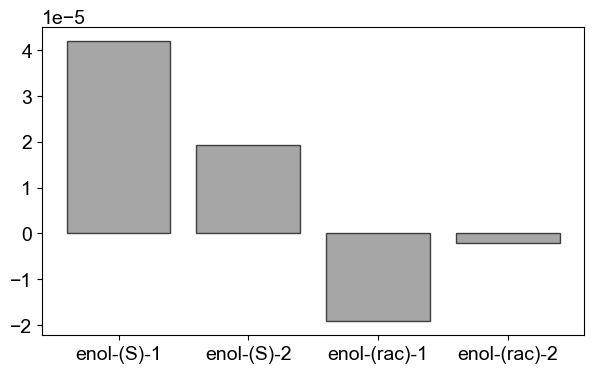

In [24]:
plt.figure(figsize=(7,4))
plt.bar(compound, coef_list, ec='k', color='gray', alpha=0.7)
# plt.savefig('./figures/DXB_slope_1.png', dpi=300)

In [25]:
coef_list

[4.185714285714288e-05,
 1.92857142857143e-05,
 -1.9142857142857174e-05,
 -2.1428571428571127e-06]

In [20]:
slope = pd.read_csv('tmp_slope.csv')

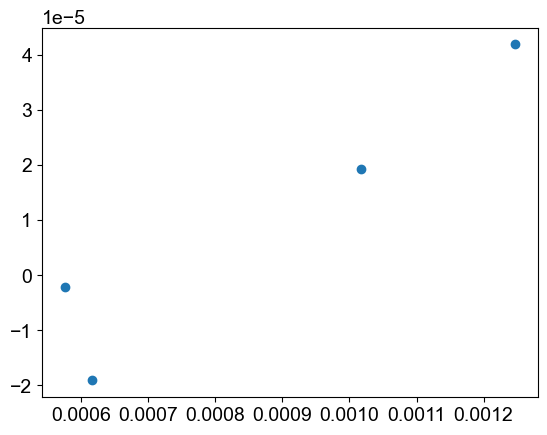

In [26]:
# plt.figure(figsize=(10,7))
# sns.heatmap(slope.corr(),linewidths=0.1, vmax=1.0, 
#             square=True, linecolor='grey', annot=True, cmap=colormap)
plt.scatter(coef_list_all[2], coef_list)